In [1]:
%matplotlib inline
path = "data/state-farm/"
#path = "data/state-farm/sample/"
import utils; reload(utils)
from utils import *

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [2]:
batch_size=64

In [29]:
%mkdir data/state-farm/sample/results

# Create Validation Set and Sample

In [21]:
import csv

In [23]:
with open(path+'driver_imgs_list.csv', 'rb') as csvfile:
    imgreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in imgreader:
        if(row[0] == 'p042' or row[0] == 'p002' or row[0] == 'p012'):
            os.rename(path+'train/'+row[1]+'/'+row[2], path + 'valid/'+row[1]+'/'+row[2])

In [10]:
%mkdir data/state-farm/sample
%mkdir data/state-farm/sample/train
%mkdir data/state-farm/sample/valid

In [12]:
%mkdir data/state-farm/valid
%mkdir data/state-farm/train

mkdir: cannot create directory ‘data/state-farm/valid’: File exists
mkdir: cannot create directory ‘data/state-farm/train’: File exists


In [6]:
%cd data/state-farm/train

/home/ubuntu/deep/nbs/data/state-farm/train


In [18]:
%mkdir data/state-farm/valid/c0
%mkdir data/state-farm/valid/c1
%mkdir data/state-farm/valid/c2
%mkdir data/state-farm/valid/c3
%mkdir data/state-farm/valid/c4
%mkdir data/state-farm/valid/c5
%mkdir data/state-farm/valid/c6
%mkdir data/state-farm/valid/c7
%mkdir data/state-farm/valid/c8
%mkdir data/state-farm/valid/c9

In [9]:
g = glob('./*/*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], '../valid/' + shuf[i])

In [35]:
from shutil import copyfile

In [45]:
%mkdir ../sample/valid/c0
%mkdir ../sample/valid/c1
%mkdir ../sample/valid/c2
%mkdir ../sample/valid/c3
%mkdir ../sample/valid/c4
%mkdir ../sample/valid/c5
%mkdir ../sample/valid/c6
%mkdir ../sample/valid/c7
%mkdir ../sample/valid/c8
%mkdir ../sample/valid/c9
%mkdir ../sample/train/c0
%mkdir ../sample/train/c1
%mkdir ../sample/train/c2
%mkdir ../sample/train/c3
%mkdir ../sample/train/c4
%mkdir ../sample/train/c5
%mkdir ../sample/train/c6
%mkdir ../sample/train/c7
%mkdir ../sample/train/c8
%mkdir ../sample/train/c9

In [41]:
%cd data/state-farm/train

/home/ubuntu/deep/nbs/data/state-farm/train


In [47]:
%ls ../sample/train

c0/  c1/  c2/  c3/  c4/  c5/  c6/  c7/  c8/  c9/


In [48]:
g = glob('*/*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], '../sample/train/' + shuf[i])

In [51]:
%cd ../

/home/ubuntu/deep/nbs


In [59]:
%mkdir data/state-farm/sample/results

In [49]:
g = glob('./*/*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], '../sample/valid/' + shuf[i])

## Move to separate dirs for each set

DONE

In [3]:
from vgg16 import Vgg16

In [4]:
vgg = Vgg16()

In [5]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)

Found 200 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [6]:
layers = vgg.model.layers
# Get the index of the first dense layer...
first_dense_idx = [index for index,layer in enumerate(layers) if type(layer) is Dense][0]
# ...and set this and all subsequent layers to trainable
for layer in layers[first_dense_idx:]:
    layer.trainable=True

In [8]:
vgg.model.optimizer.lr = 0.0001
vgg.fit(batches, val_batches, nb_epoch=5)
vgg.model.optimizer.lr = 0.001
vgg.fit(batches, val_batches, nb_epoch=5)

Epoch 1/5
200/200 [==============================] - 8s - loss: 1.7613 - acc: 0.5000 - val_loss: 2.2530 - val_acc: 0.3400
Epoch 2/5
200/200 [==============================] - 7s - loss: 2.1004 - acc: 0.4550 - val_loss: 2.2163 - val_acc: 0.3800
Epoch 3/5
200/200 [==============================] - 7s - loss: 1.8439 - acc: 0.4750 - val_loss: 2.3724 - val_acc: 0.3400
Epoch 4/5
200/200 [==============================] - 7s - loss: 1.9726 - acc: 0.4850 - val_loss: 2.3225 - val_acc: 0.4200
Epoch 5/5
200/200 [==============================] - 6s - loss: 1.5550 - acc: 0.5600 - val_loss: 2.7465 - val_acc: 0.3600
Epoch 1/5
200/200 [==============================] - 7s - loss: 1.7680 - acc: 0.5200 - val_loss: 2.5110 - val_acc: 0.3800
Epoch 2/5
200/200 [==============================] - 6s - loss: 1.6996 - acc: 0.5000 - val_loss: 2.2074 - val_acc: 0.4200
Epoch 3/5
200/200 [==============================] - 7s - loss: 1.8852 - acc: 0.5150 - val_loss: 2.3215 - val_acc: 0.4600
Epoch 4/5
200/200 [=====

In [12]:
vgg.model.optimizer.lr = 0.00001
vgg.fit(batches, val_batches, nb_epoch=5)
vgg.model.optimizer.lr = 0.0001
vgg.fit(batches, val_batches, nb_epoch=5)

Epoch 1/5
200/200 [==============================] - 8s - loss: 0.8054 - acc: 0.7250 - val_loss: 2.3963 - val_acc: 0.4000
Epoch 2/5
200/200 [==============================] - 7s - loss: 0.9268 - acc: 0.6900 - val_loss: 2.8473 - val_acc: 0.3200
Epoch 3/5
200/200 [==============================] - 7s - loss: 1.1063 - acc: 0.6550 - val_loss: 2.7368 - val_acc: 0.4400
Epoch 4/5
200/200 [==============================] - 7s - loss: 0.9275 - acc: 0.7200 - val_loss: 2.4693 - val_acc: 0.3600
Epoch 5/5
200/200 [==============================] - 7s - loss: 0.9574 - acc: 0.6850 - val_loss: 2.5272 - val_acc: 0.4000
Epoch 1/5
200/200 [==============================] - 7s - loss: 0.8588 - acc: 0.7100 - val_loss: 2.0883 - val_acc: 0.5200
Epoch 2/5
200/200 [==============================] - 7s - loss: 0.8224 - acc: 0.7450 - val_loss: 2.1190 - val_acc: 0.4800
Epoch 3/5
200/200 [==============================] - 7s - loss: 0.8817 - acc: 0.7200 - val_loss: 2.4358 - val_acc: 0.4600
Epoch 4/5
200/200 [=====

In [15]:
vgg.model.optimizer.lr = 0.0007
vgg.fit(batches, val_batches, nb_epoch=5)
vgg.model.optimizer.lr = 0.003
vgg.fit(batches, val_batches, nb_epoch=5)

Epoch 1/5
200/200 [==============================] - 8s - loss: 0.4763 - acc: 0.8350 - val_loss: 2.5367 - val_acc: 0.4400
Epoch 2/5
200/200 [==============================] - 7s - loss: 0.6297 - acc: 0.8150 - val_loss: 2.8591 - val_acc: 0.4400
Epoch 3/5
200/200 [==============================] - 7s - loss: 0.5858 - acc: 0.7700 - val_loss: 2.6138 - val_acc: 0.4200
Epoch 4/5
200/200 [==============================] - 7s - loss: 0.5027 - acc: 0.8650 - val_loss: 3.1640 - val_acc: 0.4200
Epoch 5/5
200/200 [==============================] - 7s - loss: 0.6447 - acc: 0.7800 - val_loss: 2.6804 - val_acc: 0.4600
Epoch 1/5
200/200 [==============================] - 8s - loss: 0.4469 - acc: 0.8550 - val_loss: 2.5854 - val_acc: 0.4600
Epoch 2/5
200/200 [==============================] - 7s - loss: 0.4394 - acc: 0.8650 - val_loss: 2.6412 - val_acc: 0.4400
Epoch 3/5
200/200 [==============================] - 7s - loss: 0.4240 - acc: 0.8350 - val_loss: 2.4025 - val_acc: 0.4600
Epoch 4/5
200/200 [=====

In [ ]:
vgg.model.save_weights(path+'results/first_attempt.h5')

In [40]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  0           zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [69]:
vgg.model.optimizer.lr = 0.001
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/ft1.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/ft2.h5')
vgg.model.optimizer.lr = 0.01
vgg.fit(batches, val_batches, nb_epoch=3)
vgg.model.save_weights(path+'results/ft5.h5')
vgg.fit(batches, val_batches, nb_epoch=4)
vgg.model.save_weights(path+'results/ft9.h5')

Epoch 1/1
136/200 [===================>..........] - ETA: 1s - loss: 14.9329 - acc: 0.0735

Exception: output of generator should be a tuple (x, y, sample_weight) or (x, y). Found: [[[[  64.   63.   58. ...,  208.  155.   33.]
   [  58.   57.   56. ...,  255.  254.  203.]
   [  51.   51.   52. ...,  255.  254.  246.]
   ..., 
   [   6.    6.    8. ...,   14.   19.   16.]
   [   6.    6.    8. ...,   54.   19.   17.]
   [   6.    6.    8. ...,   62.   19.   16.]]

  [[  81.   80.   75. ...,  209.  156.   34.]
   [  75.   74.   73. ...,  255.  255.  204.]
   [  68.   68.   69. ...,  255.  255.  247.]
   ..., 
   [   7.    7.    9. ...,   10.   15.   14.]
   [   7.    7.    9. ...,   49.   14.   15.]
   [   7.    7.    9. ...,   57.   14.   14.]]

  [[  71.   70.   65. ...,  203.  150.   28.]
   [  65.   64.   63. ...,  250.  249.  198.]
   [  58.   58.   59. ...,  251.  250.  242.]
   ..., 
   [   2.    2.    4. ...,   11.   16.   15.]
   [   2.    2.    4. ...,   53.   18.   18.]
   [   2.    2.    4. ...,   61.   18.   17.]]]


 [[[  38.   37.   37. ...,  255.  255.  253.]
   [  36.   35.   35. ...,  254.  254.  254.]
   [  36.   35.   35. ...,  248.  253.  255.]
   ..., 
   [  10.   11.   16. ...,   12.    2.   84.]
   [  53.   48.   48. ...,   12.    1.   88.]
   [  50.   46.   51. ...,   11.    1.   80.]]

  [[  48.   47.   47. ...,  253.  253.  255.]
   [  46.   45.   45. ...,  254.  252.  255.]
   [  46.   45.   45. ...,  253.  252.  254.]
   ..., 
   [  19.   20.   25. ...,    6.    6.  103.]
   [  62.   57.   57. ...,    6.    6.  108.]
   [  59.   55.   60. ...,    7.    9.  101.]]

  [[  40.   39.   39. ...,  255.  255.  250.]
   [  38.   37.   37. ...,  255.  255.  250.]
   [  38.   37.   37. ...,  247.  250.  250.]
   ..., 
   [  16.   17.   22. ...,    8.    7.  101.]
   [  59.   54.   54. ...,    8.    9.  107.]
   [  56.   52.   57. ...,    8.   11.  102.]]]


 [[[  20.   17.   16. ...,   78.   31.    5.]
   [  17.   16.   15. ...,  135.  142.  105.]
   [  17.   14.   14. ...,  133.  149.  162.]
   ..., 
   [  13.   15.   18. ...,    9.    9.    9.]
   [  14.   14.   19. ...,    9.    9.    9.]
   [  13.   14.   23. ...,    9.    9.    9.]]

  [[  16.   16.   17. ...,  101.   41.    3.]
   [  16.   15.   16. ...,  164.  157.  112.]
   [  16.   15.   15. ...,  172.  179.  187.]
   ..., 
   [  54.   56.   55. ...,    8.    8.    8.]
   [  58.   55.   52. ...,    8.    8.    8.]
   [  57.   56.   52. ...,    8.    8.    8.]]

  [[  13.   12.   12. ...,   72.   17.    0.]
   [  12.   11.   11. ...,  134.  134.   94.]
   [  12.   10.   10. ...,  141.  153.  165.]
   ..., 
   [  22.   24.   22. ...,    4.    4.    4.]
   [  23.   21.   21. ...,    4.    4.    4.]
   [  22.   20.   21. ...,    4.    4.    4.]]]


 ..., 
 [[[  56.   52.   48. ...,   96.   99.   93.]
   [  53.   52.   49. ...,  104.  101.   99.]
   [  55.   52.   49. ...,  103.  109.  100.]
   ..., 
   [  56.   57.   56. ...,   31.   16.   23.]
   [  55.   56.   55. ...,   31.   35.   21.]
   [  55.   55.   54. ...,   31.   60.   14.]]

  [[  59.   58.   60. ...,  137.  139.  130.]
   [  56.   58.   61. ...,  139.  136.  134.]
   [  58.   57.   61. ...,  130.  140.  131.]
   ..., 
   [  76.   77.   76. ...,   40.   25.   32.]
   [  75.   76.   75. ...,   37.   41.   27.]
   [  75.   75.   74. ...,   32.   61.   15.]]

  [[  50.   48.   46. ...,  129.  131.  123.]
   [  47.   48.   49. ...,  133.  130.  128.]
   [  51.   50.   51. ...,  125.  134.  125.]
   ..., 
   [  74.   75.   74. ...,   39.   24.   31.]
   [  73.   74.   73. ...,   37.   41.   27.]
   [  73.   73.   72. ...,   34.   63.   17.]]]


 [[[  39.   41.   40. ...,  205.  221.  236.]
   [  39.   40.   41. ...,  209.  226.  239.]
   [  43.   37.   43. ...,  217.  231.  239.]
   ..., 
   [  53.   53.   53. ...,   17.   18.   20.]
   [  54.   54.   54. ...,   14.   26.   14.]
   [  53.   53.   53. ...,   14.   35.    7.]]

  [[  50.   51.   49. ...,  251.  251.  255.]
   [  50.   50.   50. ...,  251.  254.  255.]
   [  54.   47.   51. ...,  253.  255.  255.]
   ..., 
   [  74.   74.   74. ...,   15.   16.   18.]
   [  75.   75.   75. ...,   12.   24.   12.]
   [  74.   74.   74. ...,   12.   33.    5.]]

  [[  34.   42.   48. ...,  251.  251.  255.]
   [  34.   41.   49. ...,  250.  255.  255.]
   [  38.   38.   53. ...,  253.  255.  255.]
   ..., 
   [  69.   69.   69. ...,   16.   17.   19.]
   [  70.   70.   70. ...,   13.   25.   13.]
   [  69.   69.   69. ...,   13.   34.    6.]]]


 [[[  62.   61.   62. ...,  252.  251.   59.]
   [  64.   64.   65. ...,  251.  239.  103.]
   [  68.   68.   69. ...,  246.  228.  188.]
   ..., 
   [  78.   62.   48. ...,   34.   46.   29.]
   [  70.   56.   50. ...,   36.   30.   22.]
   [  62.   53.   54. ...,   29.   19.   19.]]

  [[  75.   74.   75. ...,  254.  255.   69.]
   [  77.   77.   78. ...,  255.  249.  117.]
   [  80.   80.   81. ...,  255.  244.  208.]
   ..., 
   [  76.   60.   46. ...,   35.   51.   39.]
   [  65.   51.   48. ...,   37.   35.   30.]
   [  55.   48.   52. ...,   30.   23.   27.]]

  [[  57.   56.   57. ...,  253.  255.   71.]
   [  59.   59.   60. ...,  255.  250.  118.]
   [  60.   60.   61. ...,  255.  243.  207.]
   ..., 
   [  55.   39.   25. ...,   39.   54.   40.]
   [  45.   31.   27. ...,   39.   38.   33.]
   [  36.   28.   31. ...,   32.   26.   30.]]]]

## Predict and submit

In [5]:
vgg.model.load_weights(path+'results/aviary_vgg_003.h5')

In [6]:
val_batches, probs = vgg.test(path+'valid', batch_size = batch_size)

Found 2139 images belonging to 10 classes.


In [7]:
probs[0]

array([ 0.5223,  0.0041,  0.0009,  0.0085,  0.008 ,  0.0836,  0.0037,  0.0106,  0.053 ,  0.3053], dtype=float32)

In [8]:
labels = val_batches.classes
filenames = val_batches.filenames

In [9]:
probs = probs[:,0]
preds = np.round(1-probs)
probs[:8]

array([ 0.5223,  0.9874,  0.9668,  0.9769,  0.9719,  0.7426,  0.9841,  0.9625], dtype=float32)

In [10]:
# Number of images to view for each visualization task
n_view = 4

In [11]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles)

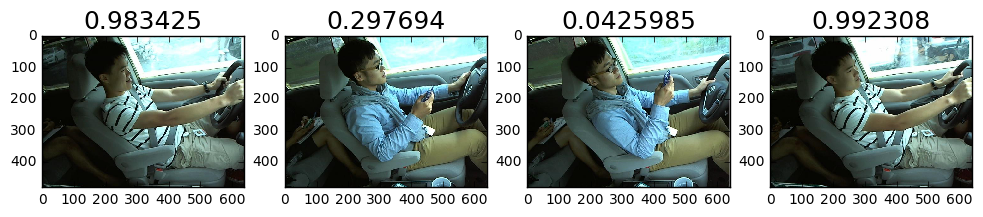

In [12]:
#1. A few correct labels at random
correct = np.where(preds==labels)[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

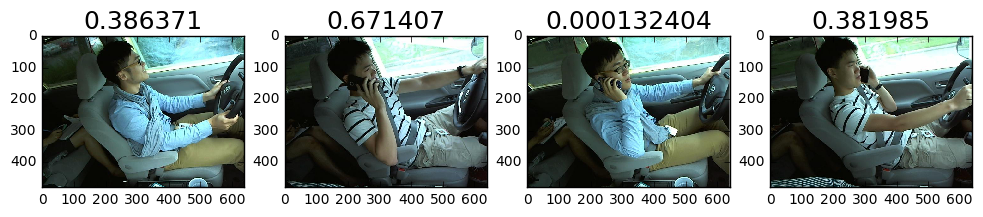

In [13]:
#2. A few incorrect labels at random
incorrect = np.where(preds!=labels)[0]
idx = permutation(incorrect)[:n_view]
plots_idx(idx, probs[idx])

[[217   2   0   0   0   0   0   0   0   0]
 [ 93 135   0   0   0   0   0   0   0   0]
 [ 37 200   0   0   0   0   0   0   0   0]
 [101 126   0   0   0   0   0   0   0   0]
 [105 134   0   0   0   0   0   0   0   0]
 [ 32 199   0   0   0   0   0   0   0   0]
 [ 12 205   0   0   0   0   0   0   0   0]
 [ 28 175   0   0   0   0   0   0   0   0]
 [ 49 116   0   0   0   0   0   0   0   0]
 [119  54   0   0   0   0   0   0   0   0]]


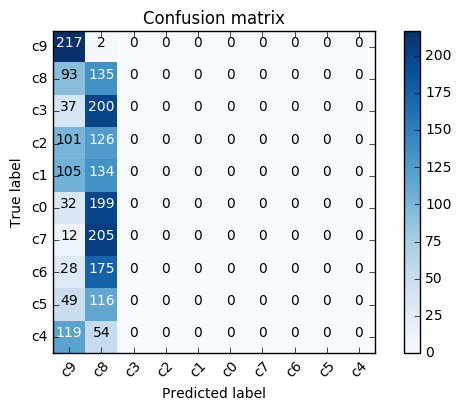

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels, preds)
plot_confusion_matrix(cm, val_batches.class_indices)